In [1]:
import numpy as np
import matplotlib.pyplot as plt

from keras.layers import LSTM, SimpleRNN, Dense
from keras.models import Sequential
from keras.optimizers import Adam

In [2]:
num_data = 10000
seq_length = 30

training_ratio = 0.8

In [3]:
data = np.random.choice(
    a = np.arange(0,9,1),
    size = (num_data, seq_length,1))

In [4]:
label = np.sum(data, axis=1) >= 100
label = label.astype(int)

In [5]:
idx = int(training_ratio * num_data)

train_data = data[:idx,:,:]
validation_data = data[idx:,:,:]

train_label = label[:idx]
validation_label = label[idx:]

In [24]:
lstm = SimpleRNN(units=1, input_shape=(None, 1))
output_layer = Dense(units=1, activation='sigmoid')

model = Sequential(
    [
        lstm, 
        output_layer
    ]
)
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
simple_rnn_3 (SimpleRNN)     (None, 1)                 3         
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 2         
Total params: 5
Trainable params: 5
Non-trainable params: 0
_________________________________________________________________


In [25]:
opt_adam = Adam(learning_rate=1e-3, beta_1=0.9, beta_2=0.999, epsilon=1e-8)

model.compile(
    loss='binary_crossentropy',
    optimizer=opt_adam,
    metrics=['accuracy']
)

In [26]:
model_hist = model.fit(
    train_data, 
    train_label, 
    validation_data=(validation_data, validation_label),
    batch_size=50, 
    shuffle=True,
    epochs=60,
    verbose=2)

Epoch 1/60
160/160 - 3s - loss: 1.4159 - accuracy: 0.0714 - val_loss: 1.2965 - val_accuracy: 0.0770
Epoch 2/60
160/160 - 2s - loss: 1.1952 - accuracy: 0.0746 - val_loss: 1.0925 - val_accuracy: 0.0815
Epoch 3/60
160/160 - 2s - loss: 1.0022 - accuracy: 0.1335 - val_loss: 0.9159 - val_accuracy: 0.1510
Epoch 4/60
160/160 - 2s - loss: 0.8285 - accuracy: 0.2039 - val_loss: 0.7434 - val_accuracy: 0.2975
Epoch 5/60
160/160 - 3s - loss: 0.5419 - accuracy: 0.6785 - val_loss: 0.3417 - val_accuracy: 0.9230
Epoch 6/60
160/160 - 2s - loss: 0.3173 - accuracy: 0.9286 - val_loss: 0.3161 - val_accuracy: 0.9230
Epoch 7/60
160/160 - 2s - loss: 0.3022 - accuracy: 0.9286 - val_loss: 0.3061 - val_accuracy: 0.9230
Epoch 8/60
160/160 - 2s - loss: 0.2932 - accuracy: 0.9286 - val_loss: 0.2986 - val_accuracy: 0.9230
Epoch 9/60
160/160 - 2s - loss: 0.2860 - accuracy: 0.9286 - val_loss: 0.2927 - val_accuracy: 0.9230
Epoch 10/60
160/160 - 3s - loss: 0.2802 - accuracy: 0.9286 - val_loss: 0.2878 - val_accuracy: 0.9230

In [27]:
model.evaluate(x=train_data, y=train_label)

250/250 [==============================] - 2s 6ms/step - loss: 0.2503 - accuracy: 0.9286


[0.25025343894958496, 0.9286249876022339]

In [28]:
model.evaluate(x=validation_data, y=validation_label)

63/63 [==============================] - 0s 7ms/step - loss: 0.2632 - accuracy: 0.9230


[0.2631676495075226, 0.9229999780654907]

In [29]:
train_predict = model.predict(train_data)
valid_predict = model.predict(validation_data)

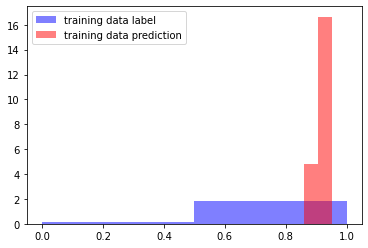

In [32]:

plt.hist(train_label, bins=2, alpha=0.5, label='training data label', color='blue', density=True)
plt.hist(train_predict, bins=2, alpha=0.5, label='training data prediction', color='red', density=True)
plt.legend()
plt.show()

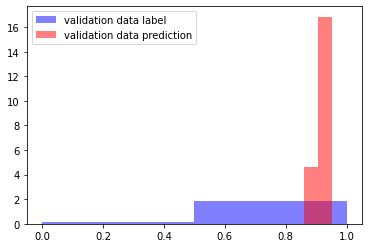

In [33]:
plt.hist(validation_label, bins=2, alpha=0.5, label='validation data label', color='blue', density=True)
plt.hist(valid_predict, bins=2, alpha=0.5, label='validation data prediction', color='red', density=True)
plt.legend()
plt.show()